<a href="https://colab.research.google.com/github/jhiltonsantos/ADS-Estatistica-IFPI/blob/master/acidentes_aereos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de dados de Acidentes Aereos (Período 2008-2018)**

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Objetivos
  Identificar, através dos anos, quais os principais tipos de acidentes em cada região do país,e observar as rotas com maiores números de ocorrências.Para isso iremos levantar:<br>  
  •Apontar qual a relação entre a quantidade de acidentes e as rotas<br>  <br>•Identificar quais os principais tipo de acidentes em cada região do país;<br>
  <br>•Observar características das aeronaves, como: ano de fabricação, modelo, tipo de motor,quantidade assentos, fabricante. E sua relação com o tipo de acidente.<br>



### Links para Ajuda

In [0]:
# http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
# https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c
# https://paulovasconcellos.com.br/como-criar-gr%C3%A1ficos-interativos-utilizando-plotly-e-python-3eb6eda57a2b
# https://plot.ly/python/bubble-maps/
# https://python-visualization.github.io/folium/quickstart.html

### Bibliotecas

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
from itertools import product
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import folium
import os

from decimal import Decimal
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

#py.init_notebook_mode(connected=True)


### Funções

In [0]:
def tem_numero(string): # Retornar se string possue numero
  return any(char.isdigit() for char in string)

def remove_repetidos(array): # Remover Elementos Repetidos do Array
    l = []
    for i in array:
        if i not in l:
            l.append(i)
    l.sort()
    return l

## Importar Dados

In [3]:
dados = pd.read_csv('https://raw.githubusercontent.com/jhiltonsantos/ADS-Estatistica-IFPI/master/Projeto%20Final/accidents_table_types.csv')
dados.dataframeName = 'Accidents'
nRow, nCol, = dados.shape

dados

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,aeronave_equipamento,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_pais_registro,aeronave_categoria_registro,aeronave_segmento_aviacao,aeronave_origem_voo,aeronave_destino_voo,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades,quantidade_fatores_contribuintes,fator_1,fator_2,fator_3,fator_4,fator_5,fator_6,fator_7,fator_8,fator_9,fator_10,fator_11,fator_12,...,fator_49,fator_50,fator_51,fator_52,fator_53,fator_54,fator_55,fator_56,fator_57,fator_58,fator_59,fator_60,fator_61,fator_62,fator_63,fator_64,fator_65,fator_66,fator_67,fator_68,fator_69,fator_70,fator_71,fator_72,fator_73,fator_74,fator_75,fator_76,fator_77,fator_78,fator_79,fator_80,fator_81,fator_82,fator_83,fator_84,fator_85,fator_86,fator_87,dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,2013-05-05,11:00:00,ARIQUEMES,RO,BRASIL,SJOG,PUAUN,ULTRALEVE,ORION LTDA,F1A EAGLE,PISTÃO,1.0,450,2.0,2005.0,BRASIL,PET,EXPERIMENTAL,****,****,CIRCUITO DE TRÁFEGO,VOO EXPERIMENTAL,SUBSTANCIAL,NaN,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
1,201805021421302,INCIDENTE,AERÓDROMO,2018-03-09,22:40:00,CACOAL,RO,BRASIL,SSKW,PRAXL,AVIÃO,EMBRAER,ERJ 190-200 IGW,JATO,2.0,52290,125.0,2012.0,BRASIL,TPR,REGULAR,SSKW,SBCY,TÁXI,VOO REGULAR,NENHUM,NaN,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
2,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,2013-11-25,12:32:00,CACOAL,RO,BRASIL,SSKW,PTRDP,AVIÃO,EMBRAER,EMB-810C,PISTÃO,2.0,2073,7.0,1980.0,BRASIL,TPX,TÁXI AÉREO,SBJI,SSKW,POUSO,TÁXI AÉREO,SUBSTANCIAL,NaN,2,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
3,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,2016-05-13,19:19:00,CACOAL,RO,BRASIL,SSKW,PTYEL,HELICÓPTERO,BELL HELICOPTER,206L-4,TURBOEIXO,1.0,2018,7.0,1997.0,BRASIL,AIF,ADMINISTRAÇÃO INDIRETA,SSKW,SSKW,APROXIMAÇÃO FINAL,OPERAÇÃO ESPECIALIZADA,LEVE,NaN,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
4,201103187273112,INCIDENTE,OUTROS,2011-03-18,13:30:00,CEREJEIRAS,RO,BRASIL,****,PTUQW,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,PISTÃO,1.0,1800,1.0,2004.0,BRASIL,SAE,ESPECIALIZADA,****,****,TÁXI,OPERAÇÃO ESPECIALIZADA,SUBSTANCIAL,NaN,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,2018-05-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5111,200811264169752,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,2008-11-26,16:40:00,NÃO IDENTIFICADA,SP,BRASIL,****,PRPSD,AVIÃO,EMBRAER,EMB-120ER,TURBOÉLICE,2.0,11990,34.0,1989.0,BRASIL,TPR,REGULAR,****,****,CRUZEIRO,VOO REGULAR,NENHUM,NaN,0,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,...,

In [0]:
#plotPerColumnDistribution(dados, 10, 5)

### Remover Dados Que Não Serão Manipulados (Fator_*)

In [4]:
remover_fator = []
for i in range(1, len(dados.columns)):
  if tem_numero(dados.columns[i]) == True:
    remover_fator.append(dados.columns[i])

dados.drop(columns=remover_fator, inplace=True)
dados.head(2)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,aeronave_equipamento,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_pais_registro,aeronave_categoria_registro,aeronave_segmento_aviacao,aeronave_origem_voo,aeronave_destino_voo,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades,quantidade_fatores_contribuintes,dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,2013-05-05,11:00:00,ARIQUEMES,RO,BRASIL,SJOG,PUAUN,ULTRALEVE,ORION LTDA,F1A EAGLE,PISTÃO,1.0,450,2.0,2005.0,BRASIL,PET,EXPERIMENTAL,****,****,CIRCUITO DE TRÁFEGO,VOO EXPERIMENTAL,SUBSTANCIAL,NaN,0,2018-05-06
1,201805021421302,INCIDENTE,AERÓDROMO,2018-03-09,22:40:00,CACOAL,RO,BRASIL,SSKW,PRAXL,AVIÃO,EMBRAER,ERJ 190-200 IGW,JATO,2.0,52290,125.0,2012.0,BRASIL,TPR,REGULAR,SSKW,SBCY,TÁXI,VOO REGULAR,NENHUM,NaN,0,2018-05-06


### Quantidade de Dados Distintos

In [5]:
dados_distintos = pd.DataFrame(dados.nunique())
dados_distintos

,0
codigo_ocorrencia,5063
ocorrencia_classificacao,3
ocorrencia_tipo,60
ocorrencia_dia,2680
ocorrencia_horario,915
ocorrencia_cidade,994
ocorrencia_uf,28
ocorrencia_pais,1
ocorrencia_aerodromo,461
aeronave_matricula,3770


### Tipos de Ocorrências

In [6]:
tipo_ocorrencias = dados['ocorrencia_tipo'].unique()
print("TIPOS DE OCORRENCIAS: \n", pd.DataFrame(tipo_ocorrencias))

TIPOS DE OCORRENCIAS: 
                                                     0
0                               FALHA DO MOTOR EM VOO
1                                           AERÓDROMO
2                                      POUSO SEM TREM
3   COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO
4                                              OUTROS
5                           PERDA DE CONTROLE NO SOLO
6                                       TRÁFEGO AÉREO
7                                         POUSO LONGO
8                            PERDA DE CONTROLE EM VOO
9                                       INDETERMINADO
10                                  COM TREM DE POUSO
11                                    ESTOURO DE PNEU
12          CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO
13                                  EXCURSÃO DE PISTA
14                                       POUSO BRUSCO
15                                          COM ROTOR
16                                  INCURSÃO EM PISTA
17  

### Quantidade de Acidentes por Estados

In [0]:
#plt.style.use("ggplot")
#acidentes_uf = dados['ocorrencia_uf'].value_counts()
#tabela_uf_acidentes = pd.DataFrame(acidentes_uf)
#print(tabela_uf_acidentes)

#accidents_sp = (dados['ocorrencia_uf'] == 'SP').value_counts()
#accidents_sp 


### Gráfico com Quantidade de Acidentes por UF

In [0]:
# grafico_uf_acidentes = dados['ocorrencia_uf'].value_counts().plot(kind='pie', subplots=True, label="Quantidade de Ocorrencia por UF", figsize=(18, 18))

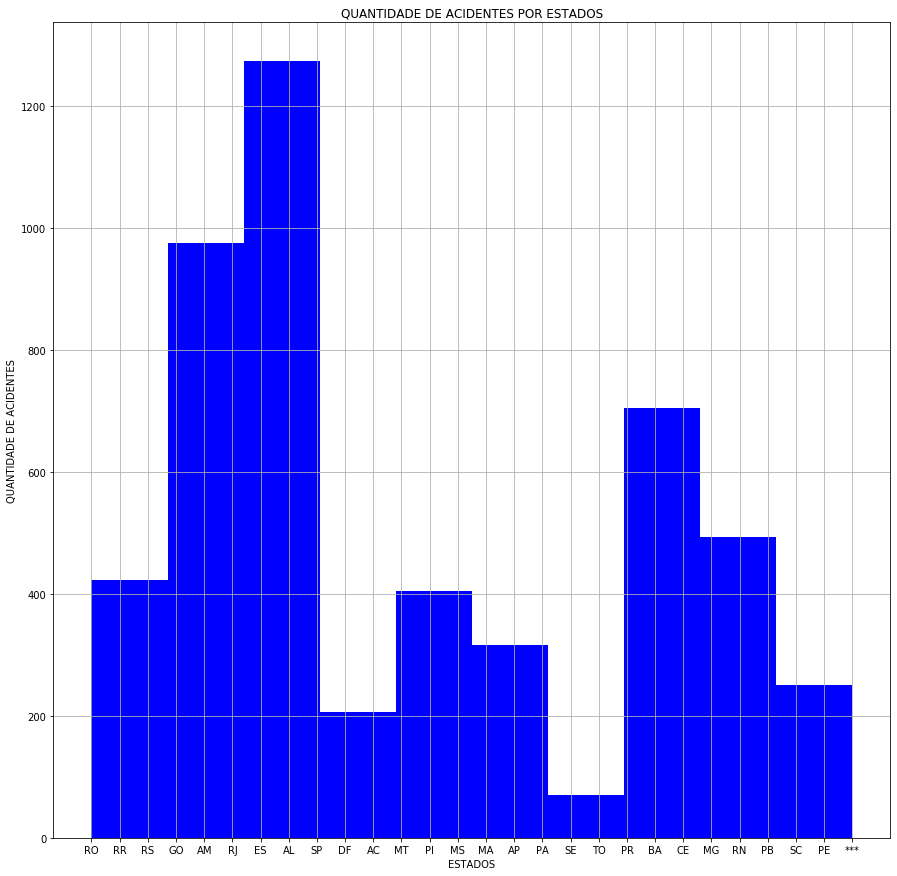

In [7]:
dados['ocorrencia_uf'].hist(figsize=(15, 15), color='Blue')
plt.title("QUANTIDADE DE ACIDENTES POR ESTADOS")
plt.xlabel("ESTADOS")
plt.ylabel("QUANTIDADE DE ACIDENTES")
plt.show()

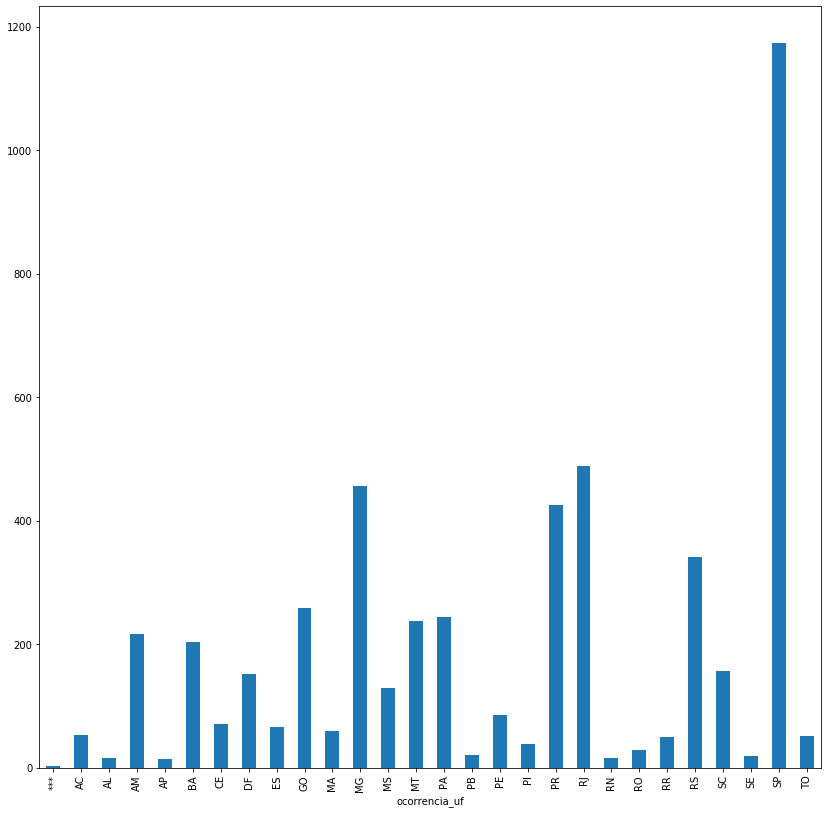

In [8]:
dados.groupby('ocorrencia_uf')['codigo_ocorrencia'].nunique().plot(kind='bar', figsize=(14, 14))
plt.show()

### Adicionando Coluna "ano" aos Dados

In [20]:
data_ocorrencias = []
for i in range(len(dados)):
  data_ocorrencias.append(dados['ocorrencia_dia'][i])

anos_ocorrencias = []
ano = []
for i in range(len(data_ocorrencias)):
  ano.append(data_ocorrencias[i].split('-'))
  anos_ocorrencias.append(ano[i][0])

# Transformar anos para inteiro
anos_int = []
for i in range(len(anos_ocorrencias)):
  anos_int.append(int(anos_ocorrencias[i]))
anos_int

dados['ano'] = anos_int
# Rows 5116
dados.head(2)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,aeronave_equipamento,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_pais_registro,aeronave_categoria_registro,aeronave_segmento_aviacao,aeronave_origem_voo,aeronave_destino_voo,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades,quantidade_fatores_contribuintes,dia_extracao,ano,latitude,longitude
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,2013-05-05,11:00:00,ARIQUEMES,RO,BRASIL,SJOG,PUAUN,ULTRALEVE,ORION LTDA,F1A EAGLE,PISTÃO,1.0,450,2.0,2005.0,BRASIL,PET,EXPERIMENTAL,****,****,CIRCUITO DE TRÁFEGO,VOO EXPERIMENTAL,SUBSTANCIAL,NaN,0,2018-05-06,2013,1,1
1,201805021421302,INCIDENTE,AERÓDROMO,2018-03-09,22:40:00,CACOAL,RO,BRASIL,SSKW,PRAXL,AVIÃO,EMBRAER,ERJ 190-200 IGW,JATO,2.0,52290,125.0,2012.0,BRASIL,TPR,REGULAR,SSKW,SBCY,TÁXI,VOO REGULAR,NENHUM,NaN,0,2018-05-06,2018,1,1


### Dados de Latitude e Longitude (Decimal) dos Estados


In [0]:
# dados_lat_long = pd.read_csv('https://raw.githubusercontent.com/jhiltonsantos/ADS-Estatistica-IFPI/master/base_geo_br.csv')


In [39]:
# Importando Latitude e Longitude das Cidades

dados_lat_long = pd.read_csv('https://raw.githubusercontent.com/jhiltonsantos/ADS-Estatistica-IFPI/master/MunicipiosBrasil.csv')
# Rows: 5509
dados_lat_long

,ID,LATITUDE,LONGITUDE,Mun/UF,MUNICIPIO,UF,Valor
0,1,-9.82,-66.88,ACRELANDIA - AC,ACRELANDIA,AC,39560.038911
1,2,-10.94,-69.56,ASSIS BRASIL - AC,ASSIS BRASIL,AC,17842.150989
2,3,-11.01,-68.74,BRASILEIA - AC,BRASILEIA,AC,93373.394313
3,4,-9.83,-67.95,BUJARI - AC,BUJARI,AC,28516.567493
4,5,-10.57,-67.67,CAPIXABA - AC,CAPIXABA,AC,18886.455136
...,...,...,...,...,...,...,...
5504,5505,-6.32,-47.41,TOCANTINOPOLIS - TO,TOCANTINOPOLIS,TO,130898.962628
5505,5506,-8.97,-48.18,TUPIRAMA - TO,TUPIRAMA,TO,6564.617815
5506,5507,-8.39,-48.11,TUPIRATINS - TO,TUPIRATINS,TO,8094.524445
5507,5508,-6.84,-47.96,WANDERLANDIA - TO,WANDERLANDIA,TO,64551.166278


In [0]:
# Esses Dados já foram inseridos em um novo CSV

# Criando colunas latitude e longitude
#dados['latitude'] = -9.42
#dados['longitude'] = -30.89

# Passando valores de base_geo_br.csv para dados
#for i in range(len(dados_lat_long)):
#  for k in range(len(dados)):
#    if dados['ocorrencia_cidade'][k] == dados_lat_long['MUNICIPIO'][i]:
#      dados['latitude'][k] = dados_lat_long['LATITUDE'][i]
#      dados['longitude'][k] = dados_lat_long['LONGITUDE'][i]




In [0]:
#export_csv = dados.to_csv(r'drive/My Drive/dados_prontos.csv', index = None, header=True)

In [62]:
dados_prontos = pd.read_csv('https://raw.githubusercontent.com/jhiltonsantos/ADS-Estatistica-IFPI/master/dados_prontos.csv')
dados_prontos.head(2)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_dia,ocorrencia_horario,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,aeronave_matricula,aeronave_equipamento,aeronave_fabricante,aeronave_modelo,aeronave_tipo_motor,aeronave_quantidade_motores,aeronave_peso_maximo_decolagem,aeronave_quantidade_assentos,aeronave_ano_fabricacao,aeronave_pais_registro,aeronave_categoria_registro,aeronave_segmento_aviacao,aeronave_origem_voo,aeronave_destino_voo,aeronave_fase_voo,aeronave_tipo_operacao,aeronave_nivel_dano,quantidade_fatalidades,quantidade_fatores_contribuintes,dia_extracao,ano,latitude,longitude
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,2013-05-05,11:00:00,ARIQUEMES,RO,BRASIL,SJOG,PUAUN,ULTRALEVE,ORION LTDA,F1A EAGLE,PISTÃO,1.0,450,2.0,2005.0,BRASIL,PET,EXPERIMENTAL,****,****,CIRCUITO DE TRÁFEGO,VOO EXPERIMENTAL,SUBSTANCIAL,NaN,0,2018-05-06,2013,-9.91,-63.04
1,201805021421302,INCIDENTE,AERÓDROMO,2018-03-09,22:40:00,CACOAL,RO,BRASIL,SSKW,PRAXL,AVIÃO,EMBRAER,ERJ 190-200 IGW,JATO,2.0,52290,125.0,2012.0,BRASIL,TPR,REGULAR,SSKW,SBCY,TÁXI,VOO REGULAR,NENHUM,NaN,0,2018-05-06,2018,-11.43,-61.44


## MAPAS 

In [52]:
valor = 0
for i in range(len(dados_prontos)):
  if (dados_prontos['ocorrencia_uf'][i]=='DF'):
    valor = i
print(valor)


209


In [53]:

mapa_br = folium.Map(location=[dados_prontos['latitude'][209], dados_prontos['longitude'][209]],
                 zoom_start = 10, control_scale = True, prefer_canvas=True)


for i in range (len(dados_prontos)):
  folium.Marker(
      location=[dados_prontos['latitude'][i], dados_prontos['longitude'][i]],
      popup="Estado(UF):"+dados_prontos['ocorrencia_uf'][i]+"<br>"
            +"<br>Tipo de Ocorrencia:"+dados_prontos['ocorrencia_tipo'][i]+"<br>"
            +"<br>Cidade:"+dados_prontos['ocorrencia_cidade'][i],
      icon=folium.Icon(color='green', icon='ok-sign'),
  ).add_to(mapa_br)

mapa_br
